In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lotka_volterra_analysis import *
from sur_data import *

In [3]:
%matplotlib notebook
plt.style.use('seaborn')

## 10 Observations and 200 Surrogate Data Points

In [4]:
data_std = np.load('data/lv_std_nobs10.npz')
data_sur = np.load('data/lv_sur_nobs10_nsur200.npz')
data_wsur = np.load('data/lv_wsur_nobs10_nsur200.npz')

In [5]:
Theta_std = data_std['Theta']
Theta_sur = data_sur['Theta']
Theta_wsur = data_wsur['Theta']

<IPython.core.display.Javascript object>


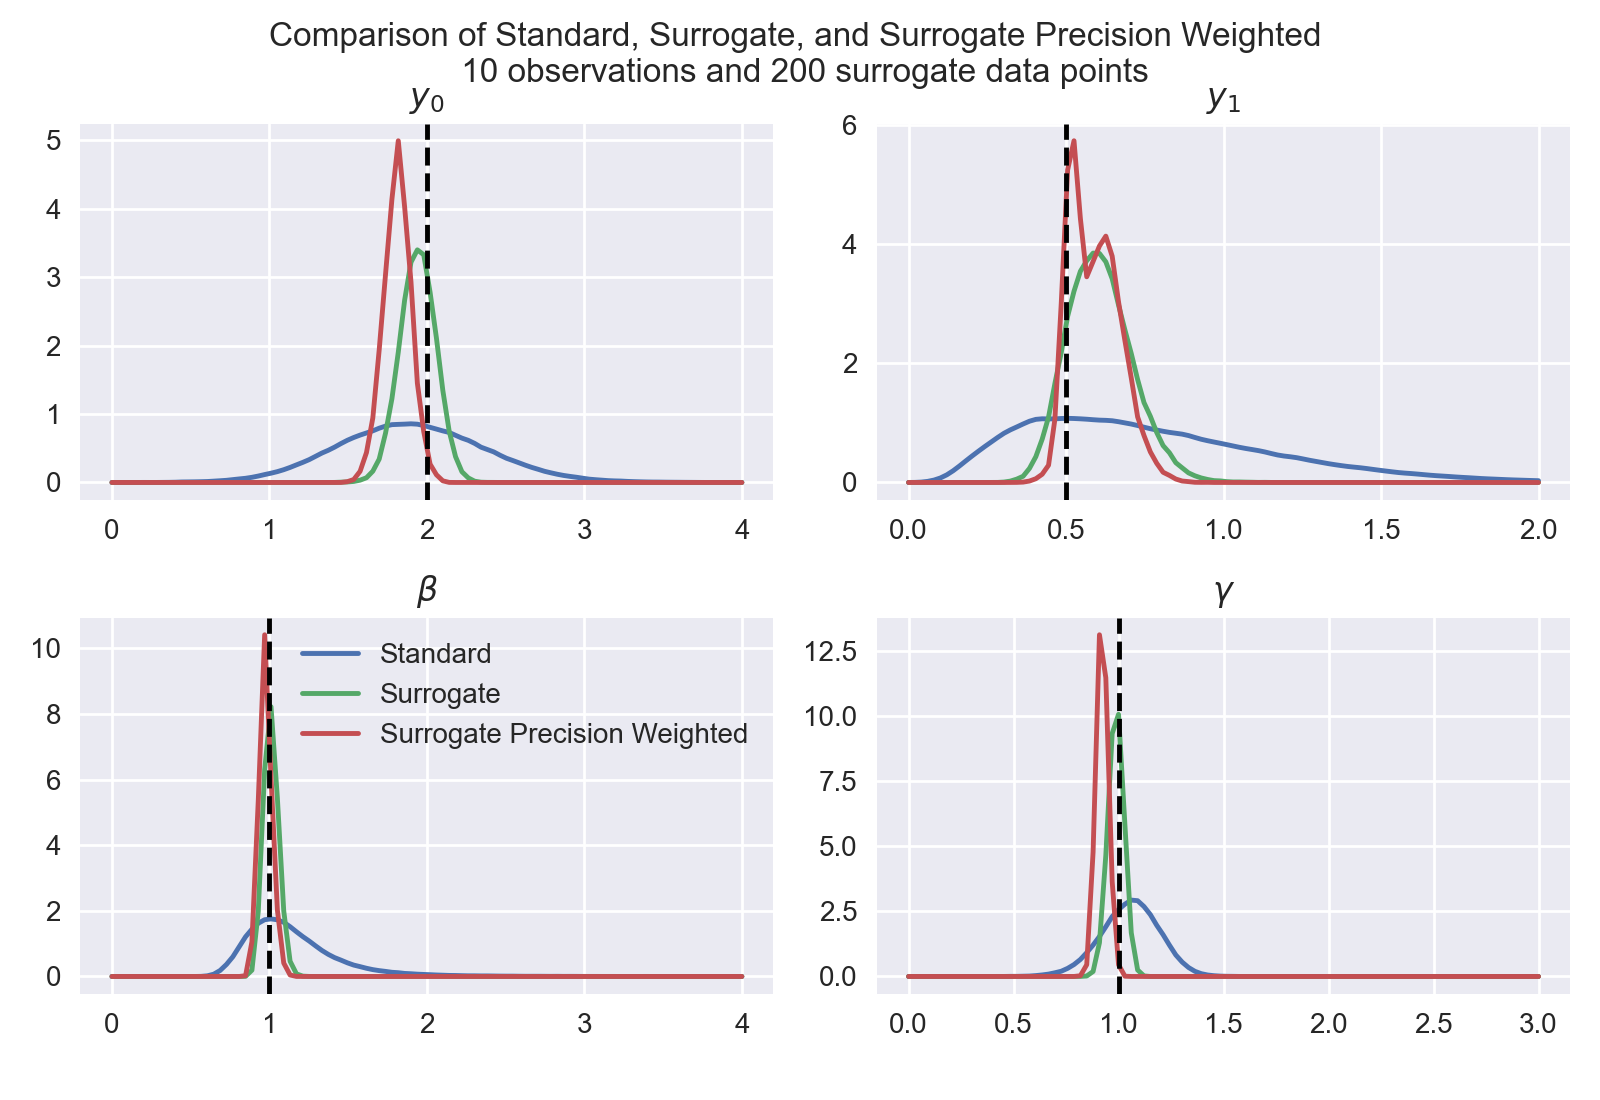

In [38]:
plot_kdes([Theta_std,Theta_sur,Theta_wsur],['Standard','Surrogate','Surrogate Precision Weighted'],[2,.5,1,1],
          'comparison_test.pdf','Comparison of Standard, Surrogate, and Surrogate Precision Weighted \n 10 observations and 200 surrogate data points')

## 5 Observations and 200 Surrogate Data Points

In [31]:
data_std2 = np.load('data/lv_std_nobs5.npz')
data_sur2 = np.load('data/lv_sur_nobs5_nsur200.npz')
data_wsur2 = np.load('data/lv_wsur_nobs5_nsur200.npz')

In [32]:
Theta_std2 = data_std2['Theta']
Theta_sur2 = data_sur2['Theta']
Theta_wsur2 = data_wsur2['Theta']

<IPython.core.display.Javascript object>


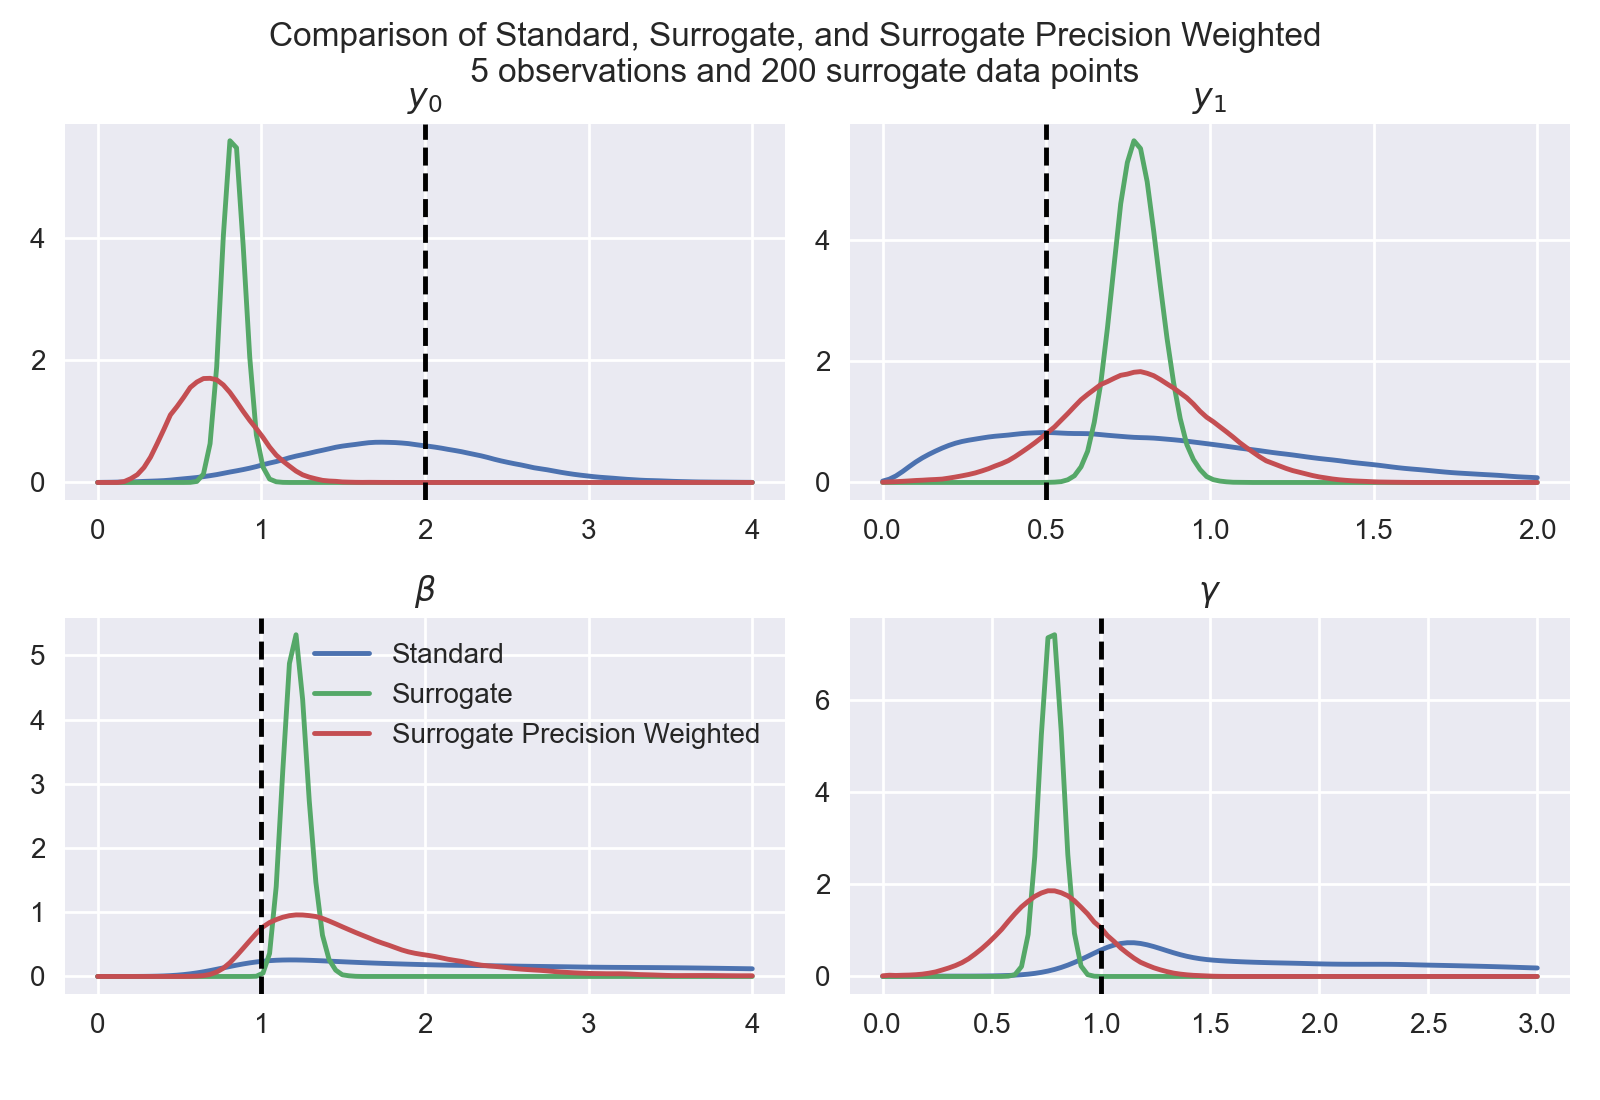

In [37]:
plot_kdes([Theta_std2,Theta_sur2,Theta_wsur2],['Standard','Surrogate','Surrogate Precision Weighted'],[2,.5,1,1],
          'comparison_test.pdf','Comparison of Standard, Surrogate, and Surrogate Precision Weighted \n 5 observations and 200 surrogate data points')

## 10 Observations and 100 surrogate data points

In [34]:
data_std3 = np.load('data/lv_std_nobs10.npz')
data_sur3 = np.load('data/lv_sur_nobs10_nsur100.npz')
data_wsur3 = np.load('data/lv_wsur_nobs10_nsur100.npz')

In [35]:
Theta_std3 = data_std3['Theta']
Theta_sur3 = data_sur3['Theta']
Theta_wsur3 = data_wsur3['Theta']

<IPython.core.display.Javascript object>


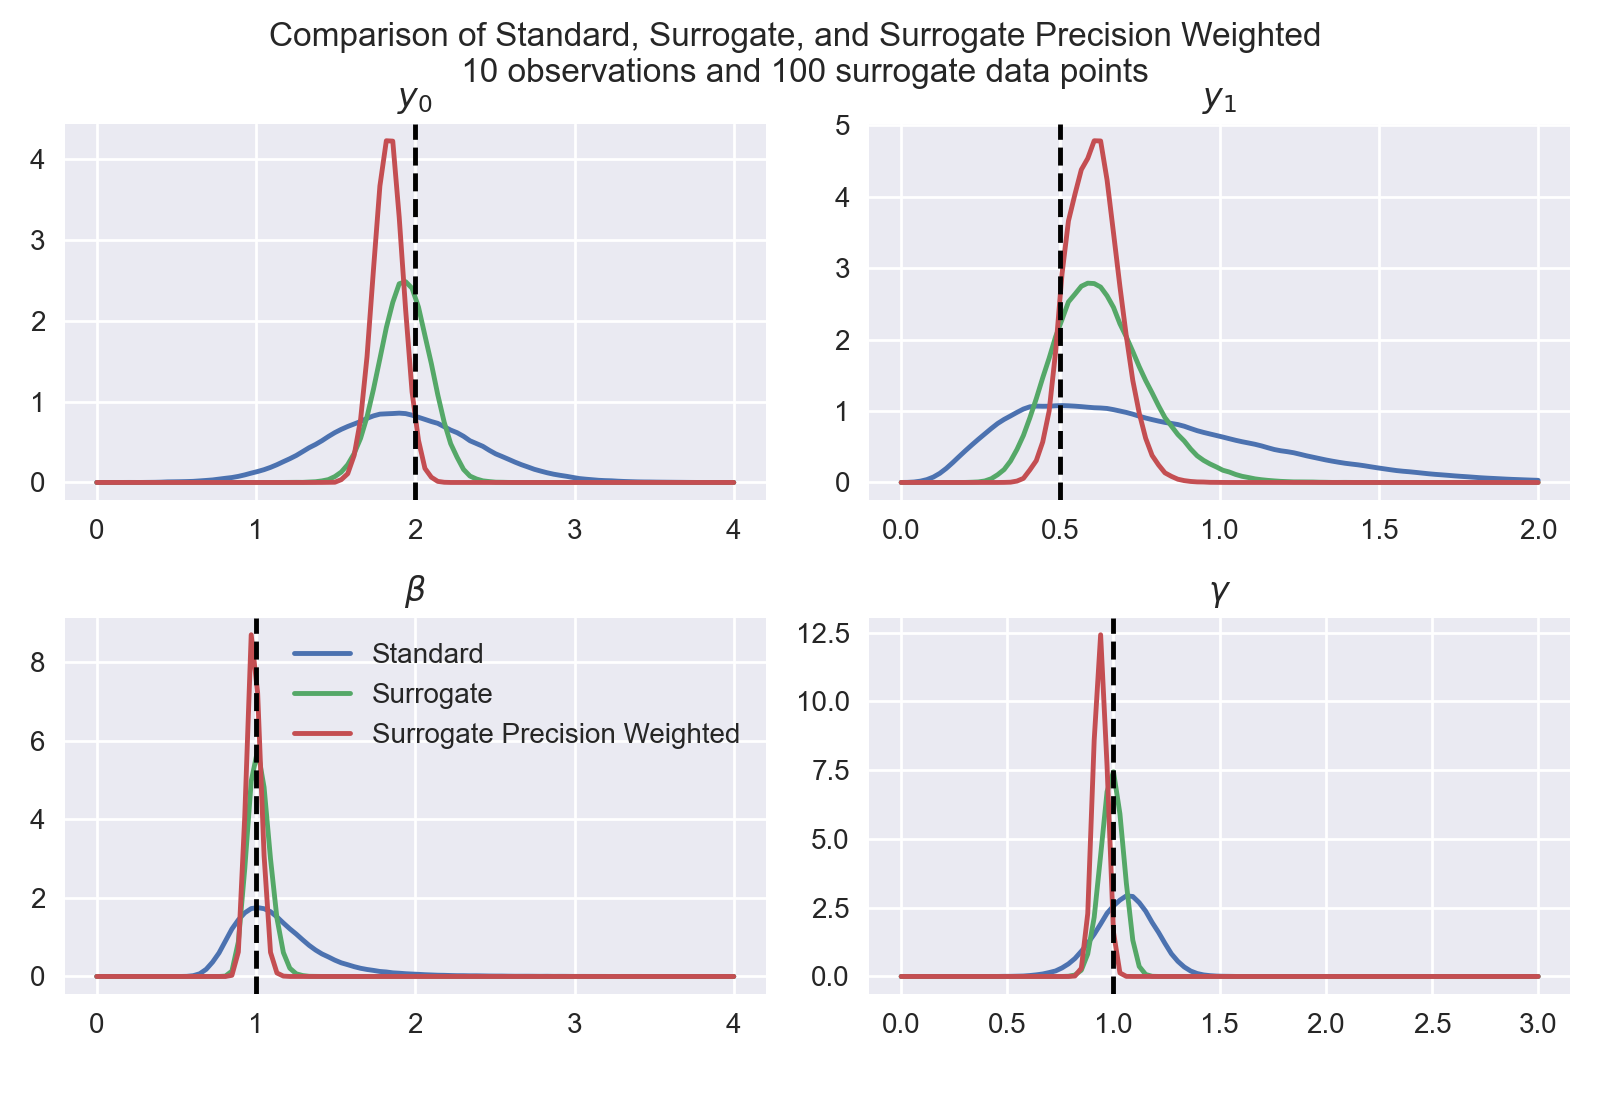

In [39]:
plot_kdes([Theta_std3,Theta_sur3,Theta_wsur3],['Standard','Surrogate','Surrogate Precision Weighted'],[2,.5,1,1],
          'comparison_test.pdf','Comparison of Standard, Surrogate, and Surrogate Precision Weighted \n 10 observations and 100 surrogate data points')

In [40]:
true_data = np.load('data/lv_data_nobs10.npz')

In [43]:
T_obs = true_data['T_obs']
y_noisy = true_data['y_noisy']
y_true = true_data['y_true']

In [57]:
y_noisy-y_true

array([[ 2.65900820e-02, -1.34211565e-05, -5.28991780e-03,
         1.59726433e-02,  8.25301279e-03,  4.45075515e-03,
         1.45103131e-02, -6.19204813e-03, -8.51317857e-03,
         2.76284073e-02],
       [-2.07959328e-02,  1.34231962e-02,  4.69466706e-03,
         3.09989196e-02, -7.85113207e-03,  7.93183506e-03,
         1.99338650e-02,  3.65282195e-02, -1.53706700e-02,
        -1.03697618e-03]])

In [44]:
y_gp = fit_gp(y_noisy,T_obs)

In [48]:
T_sur = np.linspace(0,10,200)
mean,cov = y_gp.predict(T_sur[:,np.newaxis],return_cov=True)
y_hr = solve_lv(T_sur,[2,.5],[1,1,1,1])

In [50]:
mean.shape

(200, 2)

<IPython.core.display.Javascript object>


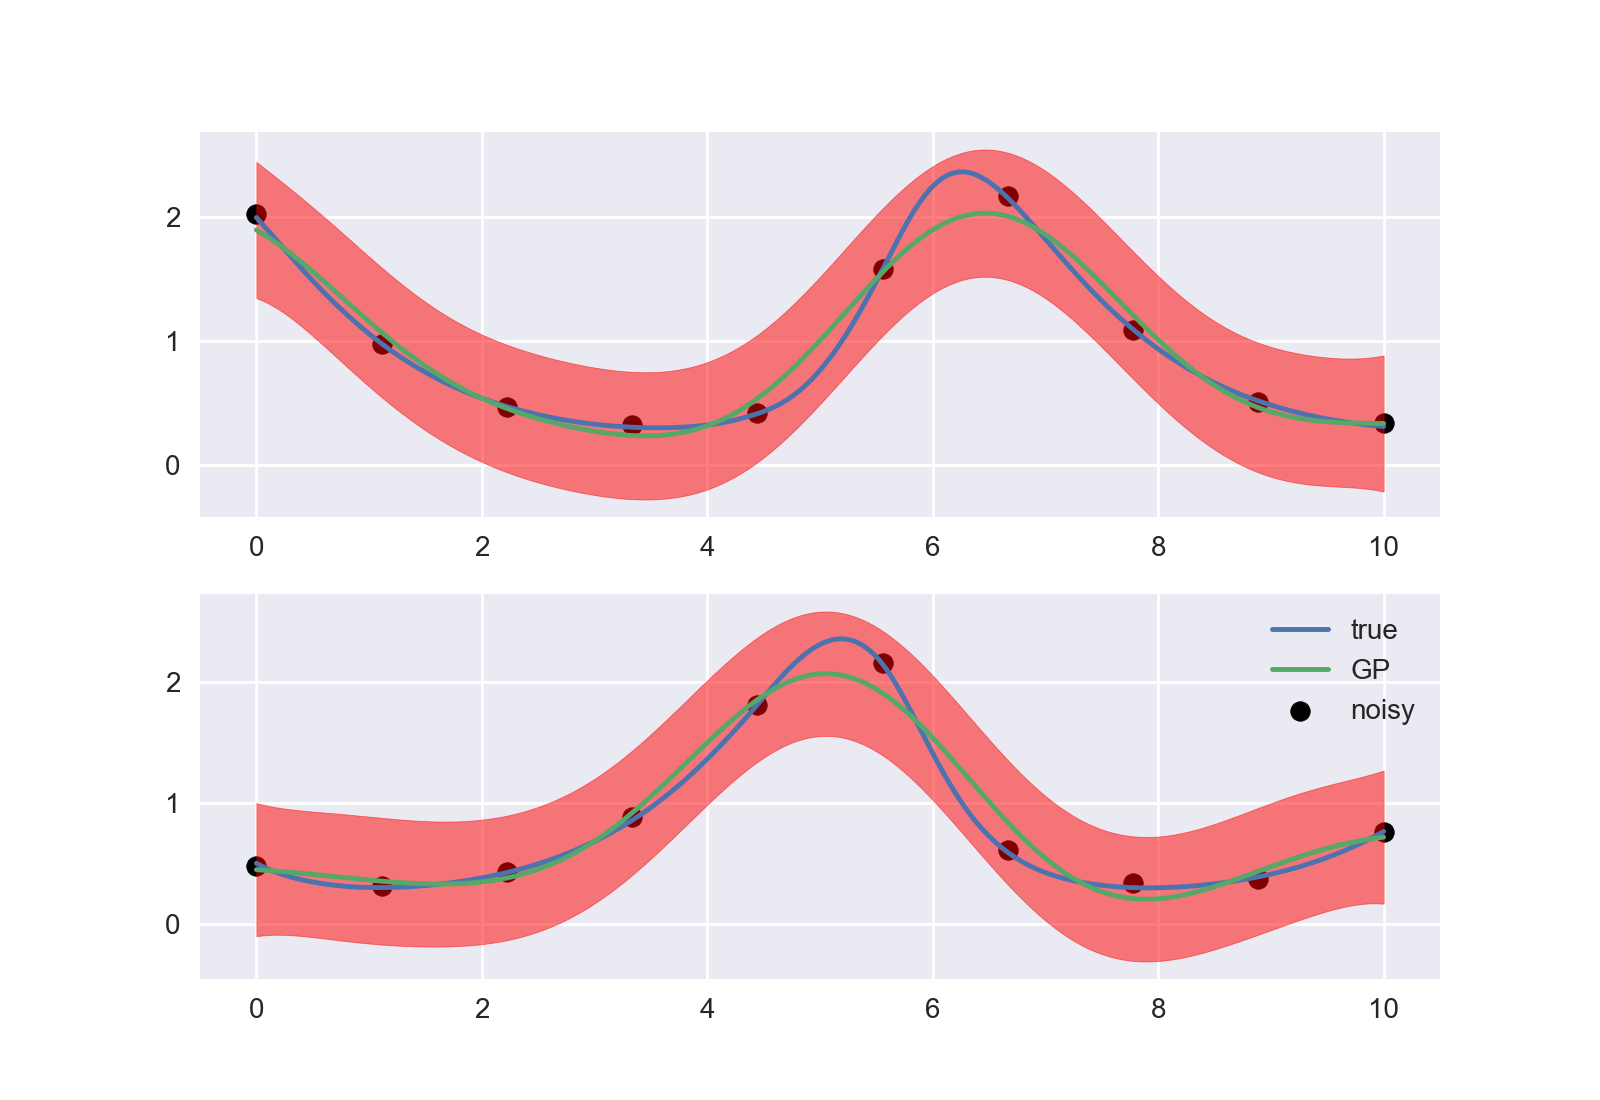

In [54]:
fig = plt.figure()
plt.subplot(211)
plt.plot(T_sur,y_hr[0],label='true')
plt.scatter(T_obs.flatten(),y_noisy[0].flatten(),c='k',label='noisy')
plt.plot(T_sur,mean[:,0],label='GP')
plt.fill_between(T_sur,mean[:,0]-2*np.sqrt(np.diag(cov)),mean[:,0]+2*np.sqrt(np.diag(cov)),color='r',alpha=.5)
plt.subplot(212)
plt.plot(T_sur,y_hr[1],label='true')
plt.scatter(T_obs.flatten(),y_noisy[1].flatten(),c='k',label='noisy')
plt.plot(T_sur,mean[:,1],label='GP')
plt.fill_between(T_sur,mean[:,1]-2*np.sqrt(np.diag(cov)),mean[:,1]+2*np.sqrt(np.diag(cov)),color='r',alpha=.5)
plt.legend()
plt.show()

In [55]:
y_gp.__dict__

{'kernel': 1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1),
 'alpha': 1e-10,
 'optimizer': 'fmin_l_bfgs_b',
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'copy_X_train': True,
 'random_state': None,
 'kernel_': 1.07**2 * RBF(length_scale=1.63) + WhiteKernel(noise_level=0.0401),
 '_rng': RandomState(MT19937) at 0x7FE81A693840,
 'n_features_in_': 1,
 '_y_train_mean': array([0.]),
 '_y_train_std': 1,
 'X_train_': array([[ 0.        ],
        [ 1.11111111],
        [ 2.22222222],
        [ 3.33333333],
        [ 4.44444444],
        [ 5.55555556],
        [ 6.66666667],
        [ 7.77777778],
        [ 8.88888889],
        [10.        ]]),
 'y_train_': array([[2.02659008, 0.47920407],
        [0.97997589, 0.31286319],
        [0.46659452, 0.42837999],
        [0.32066034, 0.88681649],
        [0.42207897, 1.80514232],
        [1.58502649, 2.15570005],
        [2.17200485, 0.60973929],
        [1.08882542, 0.33536508],
        [0.5083802 , 0.37282496],
        [0.33870242, 0.